In [9]:
%matplotlib inline
import quilt
! quilt --version

quilt 2.9.9 (quilt-2.9.9-py3.5)


In [10]:
def install_data():
    # force to avoid y/n prompt; does not re-download
    quilt.install("gudbrandtandberg/chesspieces", force=True)

In [11]:
install_data()

Fragments already downloaded


Displaying 96 of 282 images…


<Figure size 432x288 with 0 Axes>

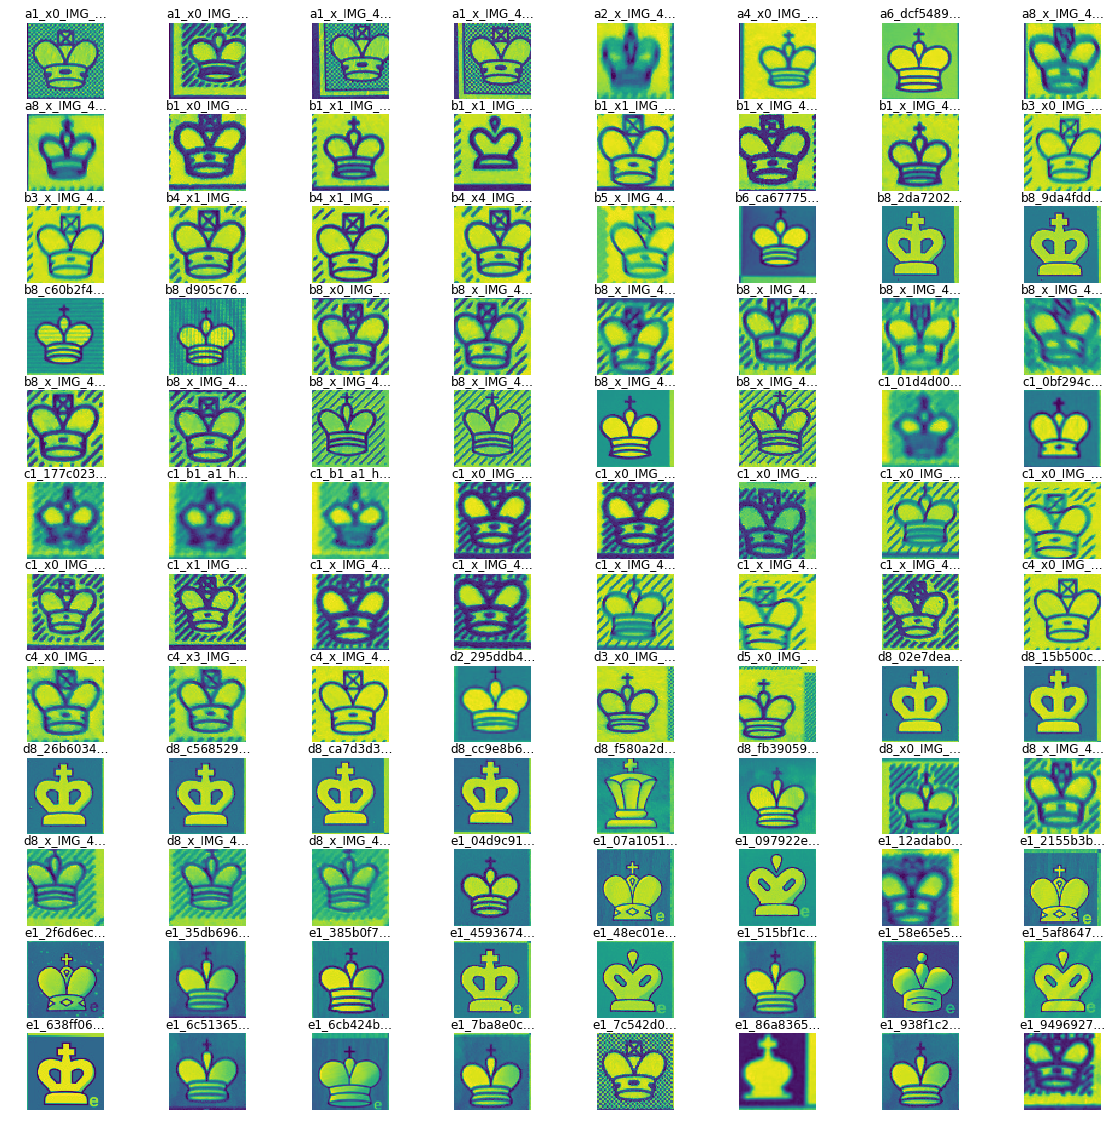

In [84]:
from quilt.data.gudbrandtandberg import chesspieces as pieces
from quilt.asa.img import plot

pieces.training.K(asa=plot(figsize=(20,20), limit=96))

# From quilt package to numpy array

X, y = get_data("train"), 

where X has shape (N, 1, 64, 64)
and y has shape (N, 1)

In [130]:
import pandas as pd
import numpy as np
from quilt.nodes import DataNode, GroupNode
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

labels = {"b": 0, "k": 1, "n": 2, "p": 3, "q": 4, "r": 5, "B": 6,\
          "f": 7, "K": 8, "N": 9, "P": 10, "Q": 11, "R": 12}

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=5,
                    zoom_range=0.05,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=5
                    )
valid_datagen = ImageDataGenerator(
                rescale=1./255,
                )

def get_data(node, N):
    from quilt.data.gudbrandtandberg import chesspieces as pieces
    
    X = np.zeros((N, 64, 64, 1))
    y = np.zeros((N, 1))
    
    i = 0
    dirs = node._group_keys()
    for directory, dir_node in zip(dirs, node):
        label = labels[directory]
        for img in dir_node:
            img = cv2.imread(img(), 0)
            X[i,:,:,0] = img
            y[i] = label
            i += 1
    
    y = to_categorical(y)
    
    return X, y

def keras_generator(*, transform=False):
    def _keras_generator(node, paths):
        datagen = None
        if transform:
            datagen = train_datagen
        else:
            datagen = valid_datagen
        
        X, y = get_data(node, len(paths))
        datagen.fit(X)
        
        return datagen.flow(X, y)
    return _keras_generator

def get_validation_generator():
    return pieces["validation"](asa=keras_generator(transform=True))

def get_training_generator():
    return pieces["training"](asa=keras_generator(transform=False))


training_generator = get_training_generator()
valid_generator = get_validation_generator()


6560

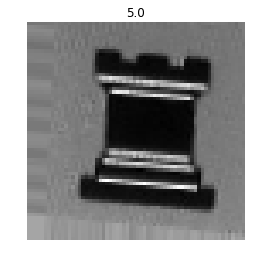

In [112]:
import matplotlib.pyplot as plt
i=4
plt.imshow(X_b[i,:,:,0], cmap="gray")
plt.axis("off")
plt.show()

# Get dataset as a Keras ImageDataGenerator 

KeyError: <GroupNode>
B/
K/
N/
P/
Q/
R/
b/
f/
k/
n/
p/
q/
r/
